<a href="https://colab.research.google.com/github/JakeOh/202208_itw_java134_lab_python/blob/main/ml03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Machine Learning(기계 학습)
    * 지도 학습(supervised learning): 레이블이 있는 데이터를 학습.
        * 분류(classification): 클래스를 분류.
        * 회귀(regression): 숫자를 예측.
    * 비지도 학습(unsupervised learning): 레이블이 없는 데이터를 학습.


# 문제 정의 

fish 데이터 셋에서 물고기의 무게(Weight)를 다른 변수(특성)들을 사용해서 예측.

* Perch(농어)의 무게를 길이만으로 예측.
    * Weight(관심변수, 종속변수, 타겟, 레이블) ~ Length(독립변수, 특성)
* Perch의 무게를 다른 모든 특성들을 사용해서 예측.
    * Weight ~ Length + Diagonal + Height + Width


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리
from sklearn.preprocessing import StandardScaler  # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures  # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline  # 변환기와 예측기를 연결해주는 클래스
from sklearn.neighbors import KNeighborsRegressor  # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression  # 선형 회귀를 사용한 숫자 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # 회귀 평가 지표들

# 데이터 준비

In [2]:
# CSV 파일 경로
fish_csv = 'https://github.com/JakeOh/202208_itw_java134_lab_python/raw/main/fish.csv'

In [3]:
# DataFrame 생성
fish_df = pd.read_csv(fish_csv)

In [4]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

# Perch의 Weight를 Length로 예측

In [6]:
perch = fish_df[fish_df.Species == 'Perch']  # 농어(perch)들의 부분집합
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [7]:
# X: 특성 배열(2d-array), y: 타겟 배열(1d-array)
X = perch[['Length']].values  #> (56, 1) shape의 2d-array
y = perch['Weight'].values  #> (56,) shape의 1d-array

In [8]:
X.shape, y.shape

((56, 1), (56,))

## train/test split

In [9]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [10]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

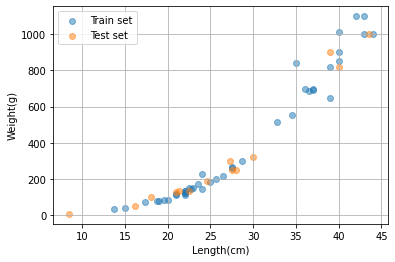

In [11]:
# Weight ~ Length 시각화. 훈련/테스트 셋의 색깔을 다르게 표현.
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.grid()
plt.show()

## KNN Regressor 모델 훈련, 평가

1. KNN 모델 생성
1. KNN 모델을 훈련 셋으로 훈련
1. 평가
    * 훈련 셋 평가
    * 테스트 셋 평가


In [12]:
knn_reg = KNeighborsRegressor()  # ML 모델 생성

In [13]:
knn_reg.fit(X_tr, y_tr)  # 모델 훈련 - 지도 학습

KNeighborsRegressor()

In [14]:
y_tr_pred = knn_reg.predict(X_tr)  # 훈련 셋의 (무게) 예측값
print(y_tr_pred)

[  88.6  123.    79.6   70.6  723.   193.   847.   847.  1010.   123.
   95.   123.   174.   248.  1010.   847.   174.   113.   248.   847.
  659.   224.   723.    60.   140.    60.   719.   694.2  248.   167.
  847.   113.   168.   123.  1010.   136.    79.6  719.   123.   193.
  990.   659. ]


In [15]:
print(y_tr)  # 훈련 셋의 (무게) 실젯값

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


KNN(K-Nearest Neighbors) Regressor는 샘플에서 가장 가까운 k개의 훈련 셋의 레이블(타겟)들의 평균으로 숫자를 예측하는 ML 모델.

In [16]:
# 첫번째 훈련 샘플에서 가장 가까운 이웃 5개의 인덱스
indices = knn_reg.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
print(indices)

[[ 0 10 36  2 17]]


In [17]:
y_tr[indices[0]].mean()  # 가장 가까운 이웃 5개의 무게(타겟)들의 평균

88.6

In [18]:
# 테스트 셋의 예측값
y_te_pred = knn_reg.predict(X_te)
print(y_te_pred)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]


In [19]:
print(y_te)  # 테스트 셋의 실젯값

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 회귀 모델 평가 지표

* MAE(Mean Absolute Error): 오차들의 절대값의 평균.
* MSE(Mean Squared Error): 오차들의 제곱의 평균.
* RMSE(Root Mean Squared Error): MSE의 제곱근.
* MAE, MSE, RMSE는 값이 작을 수록 좋은 점수. 값이 작을 수록 더 좋은 회귀 모델.
    * 평가 지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수로 생각.
    * 회귀에서도 오차가 작을 수록 점수가 높아지고, 오차가 클 수록 점수가 낮아지는 평가 지표를 개발 -> R2 score(결정계수)
    * R2 score는 1에 가까울 수록 오차가 작은 모델, 작을 수록 오차가 큰 모델.


* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{\text{MSE}}{\text{Variance}} 
    = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [20]:
# 훈련 셋 평가 지표들
print('MAE:', mean_absolute_error(y_tr, y_tr_pred))
print('MSE:', mean_squared_error(y_tr, y_tr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
print('R2 score:', r2_score(y_tr, y_tr_pred))

MAE: 35.76190476190476
MSE: 3716.5161904761903
RMSE: 60.96323638453089
R2 score: 0.9698823289099254


In [21]:
# 테스트 셋 평가 지표들
print('MAE:', mean_absolute_error(y_te, y_te_pred))
print('MSE:', mean_squared_error(y_te, y_te_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_te, y_te_pred)))
print('R2 score:', r2_score(y_te, y_te_pred))

MAE: 19.157142857142862
MSE: 721.7385714285714
RMSE: 26.865192562655704
R2 score: 0.992809406101064


In [23]:
knn_reg.score(X_tr, y_tr)  # 훈련 셋 점수 - KNN Regressor의 score 메서드는 결정계수를 리턴.

0.9698823289099254

In [25]:
knn_reg.score(X_te, y_te)  # 결정 계수(R2 score)

0.992809406101064

## 선형 회귀(Linear Regression)

머신 러닝 알고리즘:

* 사례 기반 학습(instance-based learning):
    * KNN, ...
    * 수학적인 모델을 만들지 않고, 훈련 셋 데이터의 특징들을 사용해서 예측.
    * outlier(이상치)들이 많은 경우에는 성능이 나빠질 수 있음.
* 모델 기반 학습(model-based learning):
    * Linear Regression, LogisticRegression, ...
    * 훈련 셋을 사용해서 수학적인 모델을 만들고, 모델을 사용해서 예측.


In [26]:
lin_reg = LinearRegression()  # ML 모델 생성

In [27]:
lin_reg.fit(X_tr, y_tr)  # ML 모델 훈련 셋으로 학습시킴

LinearRegression()

선형 회귀에서 학습이란 
$$ 
y = a \times x + b 
$$ 
수학 모델에서 직선의 기울기(계수) a와 직선의 y절편 b를 찾는 과정.

In [28]:
lin_reg.coef_  # coefficient: 독립변수 x에 곱해주는 계수(상수)

array([39.01714496])

In [29]:
lin_reg.intercept_  # y절편:

-709.0186449535477

$$
Weight = 39 \times Length -709
$$

In [30]:
y_tr_pred = lin_reg.predict(X_tr)
print(y_tr_pred)

[  55.71739633  149.35854425   20.60196587  -30.12032259  695.59857374
  266.40997914  851.66715359  812.65000863  968.71858848  149.35854425
   71.32425432  149.35854425  227.39283417  363.95284155  968.71858848
  851.66715359  227.39283417  110.34139928  363.95284155  851.66715359
  570.74370985  324.93569658  715.10714622 -174.48375895  176.67054572
 -123.7614705   734.6157187   656.58142877  410.7734155   207.88426169
  812.65000863  110.34139928  188.37568921  149.35854425 1007.73573345
  168.86711673   32.30710936  734.6157187   149.35854425  289.82026612
  929.70144352  637.07285629]


In [34]:
39 * X_tr[:5] - 709

array([[ 55.4],
       [149. ],
       [ 20.3],
       [-30.4],
       [695. ]])

In [31]:
print(y_tr)

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [33]:
mse = mean_squared_error(y_tr, y_tr_pred)
print(mse)
print(np.sqrt(mse))
print(r2_score(y_tr, y_tr_pred))
#> KNN의 결과보다 평균적으로 오차가 더 크다.

7422.953552609781
86.1565641875869
0.939846333997604


In [35]:
y_te_pred = lin_reg.predict(X_te)  # 테스트 셋에서의 예측값
print(y_te_pred)

[-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


In [36]:
print(y_te)  # 테스트 셋 실젯값(무게)

[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


In [37]:
mse = mean_squared_error(y_te, y_te_pred)
print(mse)  # MSE
print(np.sqrt(mse))  # RMSE
print(r2_score(y_te, y_te_pred))

17590.265977889187
132.6283000640858
0.8247503123313558


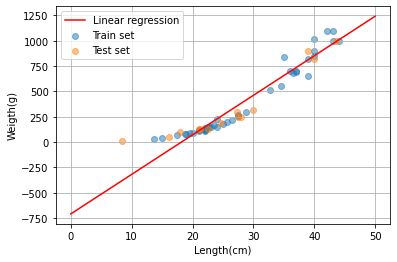

In [41]:
# 훈련 셋 산점도
plt.scatter(X_tr.ravel(), y_tr, alpha=0.5, label='Train set')
# 테스트 셋 산점도
plt.scatter(X_te.ravel(), y_te, alpha=0.5, label='Test set')

# 선형 회귀 모델(직선 y = ax + b) 시각화
xs = np.arange(0, 50, 0.01)
a = lin_reg.coef_[0]
b = lin_reg.intercept_
ys = a * xs + b
plt.plot(xs, ys, 'r-', label='Linear regression')

plt.legend()
plt.grid()
plt.xlabel('Length(cm)')
plt.ylabel('Weigth(g)')
plt.show()